In [1]:
import sys
sys.path.append('/Users/wsr217/Workspace/crosslingual_factual_memorization/dataset')

In [2]:
import argparse
import collections
import os

import wandb
from datasets import Dataset
from constants import LANGUAGES
from pararel_utils import (
    MPARAREL_FOLDER,
    PATTERNS_FOLDER,
    SUBJECT_KEY,
    SUBJECT_QCODE,
    TUPLES_FOLDER,
    get_mpararel_subject_object,
    get_mpararel_templates,
)
from tqdm import tqdm

/Users/wsr217/miniconda3/envs/consistency-rlhf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dataset = []
patterns_path = os.path.join(MPARAREL_FOLDER, PATTERNS_FOLDER)
tuples_folder = TUPLES_FOLDER
for lang in tqdm(os.listdir(patterns_path), desc="Languages"):
    os.makedirs(os.path.join(patterns_path, lang), exist_ok=True)
    for relation_filename in tqdm(
        os.listdir(os.path.join(patterns_path, lang)), desc="Relations"
    ):
        templates = []
        for template in get_mpararel_templates(lang, relation_filename, mask_lm=True):
            templates.append(template)
        tuples_data = get_mpararel_subject_object(
            lang,
            relation_filename,
            tuples_folder=tuples_folder,
            only_tuple=False,
        )
        relation = relation_filename.replace(".jsonl", "")
        for tuple_ in tuples_data:
            dataset.extend(
                [
                    {
                        "id": f"{lang}_{relation}_{tuple_[SUBJECT_QCODE]}_{template_id}",
                        "language": lang,
                        "relation": relation,
                        "template": templates[template_id],
                        "template_id": template_id,
                        "query": templates[template_id].replace(
                            "[X]", tuple_[SUBJECT_KEY]
                        ),
                        **tuple_,
                    }
                    for template_id in range(len(templates))
                ]
            )
ds = Dataset.from_list(dataset)

Languages: 100%|████████████████████████████████████████████████████████████████████████| 46/46 [00:10<00:00,  4.35it/s]


In [8]:
collections.Counter(ds.filter(lambda ex: ex["template_id"] == 0)["language"])

Counter({'en': 28152,
         'de': 24593,
         'nl': 24497,
         'fr': 23925,
         'es': 22981,
         'it': 21255,
         'ja': 18754,
         'sv': 18552,
         'ca': 18375,
         'pt': 16909,
         'ru': 16781,
         'fi': 15896,
         'pl': 15790,
         'da': 14851,
         'hu': 14265,
         'ar': 13367,
         'cs': 12298,
         'fa': 12229,
         'sl': 12184,
         'uk': 11280,
         'he': 11244,
         'sq': 11096,
         'tr': 10848,
         'ko': 10304,
         'id': 10136,
         'ga': 9985,
         'ro': 8849,
         'zh-hant': 8586,
         'el': 7467,
         'vi': 7391,
         'zh-hans': 7357,
         'gl': 7307,
         'hy': 7003,
         'et': 6822,
         'cy': 6770,
         'bg': 6417,
         'sk': 6377,
         'ms': 5706,
         'lt': 5674,
         'hr': 5670,
         'bn': 4914,
         'lv': 4903,
         'th': 4861,
         'az': 4792,
         'af': 4552,
         'is': 3365}

In [3]:
dataset = []
patterns_path = os.path.join(MPARAREL_FOLDER, PATTERNS_FOLDER)
tuples_folder = TUPLES_FOLDER
for lang in tqdm(os.listdir(patterns_path), desc="Languages"):
    os.makedirs(os.path.join(patterns_path, lang), exist_ok=True)
    for relation_filename in tqdm(
        os.listdir(os.path.join(patterns_path, lang)), desc="Relations"
    ):
        templates = []
        for template in get_mpararel_templates(lang, relation_filename):
            assert template.endswith("[Y]")
            template = template.replace("[Y]", "").strip()
            templates.append(template)
        tuples_data = get_mpararel_subject_object(
            lang,
            relation_filename,
            tuples_folder=tuples_folder,
            only_tuple=False,
        )
        relation = relation_filename.replace(".jsonl", "")
        for tuple_ in tuples_data:
            dataset.extend(
                [
                    {
                        "id": f"{lang}_{relation}_{tuple_[SUBJECT_QCODE]}_{template_id}",
                        "language": lang,
                        "relation": relation,
                        "template": templates[template_id],
                        "template_id": template_id,
                        "query": templates[template_id].replace(
                            "[X]", tuple_[SUBJECT_KEY]
                        ),
                        **tuple_,
                    }
                    for template_id in range(len(templates))
                ]
            )
ds = Dataset.from_list(dataset)

Languages: 100%|████████████████████████████████████████████████████████████████████████| 46/46 [00:34<00:00,  1.34it/s]


In [5]:
collections.Counter(ds.filter(lambda ex: ex["template_id"] == 0)["language"])

Counter({'en': 28152,
         'de': 24593,
         'nl': 24497,
         'fr': 23925,
         'es': 22981,
         'it': 21255,
         'sv': 18552,
         'ca': 18375,
         'pt': 16909,
         'ru': 16781,
         'pl': 15790,
         'fi': 15442,
         'da': 14698,
         'ar': 13367,
         'cs': 12298,
         'sl': 12184,
         'hu': 11500,
         'uk': 11280,
         'he': 11244,
         'sq': 11096,
         'id': 10136,
         'ga': 9985,
         'ro': 8849,
         'el': 7467,
         'vi': 7391,
         'gl': 7307,
         'fa': 7115,
         'et': 6822,
         'cy': 6770,
         'bg': 6417,
         'sk': 6377,
         'zh-hant': 5709,
         'ms': 5706,
         'hr': 5670,
         'lt': 5149,
         'th': 4861,
         'lv': 4572,
         'af': 4552,
         'zh-hans': 4468,
         'tr': 3671,
         'is': 3365,
         'hy': 2938,
         'ko': 2117,
         'ja': 1978,
         'az': 1556,
         'bn': 155})

In [6]:
def filter_trivial_examples(ds):
    def is_trivial_example(ex):
        objs = ex["obj_label"]
        if not isinstance(objs, list):
            objs = [objs]
        for obj in objs:
            if obj.lower() in ex["query"].lower():
                True
        return False

    filtered = ds.filter(lambda ex: not is_trivial_example(ex))
    return filtered
ds = filter_trivial_examples(ds)
collections.Counter(ds.filter(lambda ex: ex["template_id"] == 0)["language"])

Counter({'en': 28152,
         'de': 24593,
         'nl': 24497,
         'fr': 23925,
         'es': 22981,
         'it': 21255,
         'sv': 18552,
         'ca': 18375,
         'pt': 16909,
         'ru': 16781,
         'pl': 15790,
         'fi': 15442,
         'da': 14698,
         'ar': 13367,
         'cs': 12298,
         'sl': 12184,
         'hu': 11500,
         'uk': 11280,
         'he': 11244,
         'sq': 11096,
         'id': 10136,
         'ga': 9985,
         'ro': 8849,
         'el': 7467,
         'vi': 7391,
         'gl': 7307,
         'fa': 7115,
         'et': 6822,
         'cy': 6770,
         'bg': 6417,
         'sk': 6377,
         'zh-hant': 5709,
         'ms': 5706,
         'hr': 5670,
         'lt': 5149,
         'th': 4861,
         'lv': 4572,
         'af': 4552,
         'zh-hans': 4468,
         'tr': 3671,
         'is': 3365,
         'hy': 2938,
         'ko': 2117,
         'ja': 1978,
         'az': 1556,
         'bn': 155})

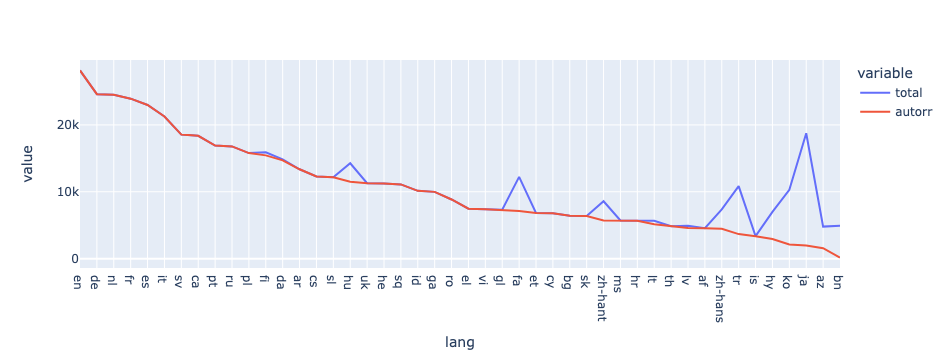

In [11]:
import pandas as pd
import plotly.express as px

mpararel_examples = {'en': 28152,
         'de': 24593,
         'nl': 24497,
         'fr': 23925,
         'es': 22981,
         'it': 21255,
         'ja': 18754,
         'sv': 18552,
         'ca': 18375,
         'pt': 16909,
         'ru': 16781,
         'fi': 15896,
         'pl': 15790,
         'da': 14851,
         'hu': 14265,
         'ar': 13367,
         'cs': 12298,
         'fa': 12229,
         'sl': 12184,
         'uk': 11280,
         'he': 11244,
         'sq': 11096,
         'tr': 10848,
         'ko': 10304,
         'id': 10136,
         'ga': 9985,
         'ro': 8849,
         'zh-hant': 8586,
         'el': 7467,
         'vi': 7391,
         'zh-hans': 7357,
         'gl': 7307,
         'hy': 7003,
         'et': 6822,
         'cy': 6770,
         'bg': 6417,
         'sk': 6377,
         'ms': 5706,
         'lt': 5674,
         'hr': 5670,
         'bn': 4914,
         'lv': 4903,
         'th': 4861,
         'az': 4792,
         'af': 4552,
         'is': 3365}
mpararel_autoregressive = {'en': 28152,
         'de': 24593,
         'nl': 24497,
         'fr': 23925,
         'es': 22981,
         'it': 21255,
         'sv': 18552,
         'ca': 18375,
         'pt': 16909,
         'ru': 16781,
         'pl': 15790,
         'fi': 15442,
         'da': 14698,
         'ar': 13367,
         'cs': 12298,
         'sl': 12184,
         'hu': 11500,
         'uk': 11280,
         'he': 11244,
         'sq': 11096,
         'id': 10136,
         'ga': 9985,
         'ro': 8849,
         'el': 7467,
         'vi': 7391,
         'gl': 7307,
         'fa': 7115,
         'et': 6822,
         'cy': 6770,
         'bg': 6417,
         'sk': 6377,
         'zh-hant': 5709,
         'ms': 5706,
         'hr': 5670,
         'lt': 5149,
         'th': 4861,
         'lv': 4572,
         'af': 4552,
         'zh-hans': 4468,
         'tr': 3671,
         'is': 3365,
         'hy': 2938,
         'ko': 2117,
         'ja': 1978,
         'az': 1556,
         'bn': 155}
data = []
for lang in mpararel_examples.keys():
    data.append([lang, mpararel_examples[lang], mpararel_autoregressive[lang]])
df = pd.DataFrame(data, columns=["lang", "total", "autorr"])
df = df.sort_values(by=["autorr"], ascending=False)

fig = px.line(df, x="lang", y=["total", "autorr"])
fig.show()